In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd

%matplotlib inline

In [2]:
df_ts = pd.read_csv('../filled_clean_data/filled-clean-world-happiness-report.csv')

In [3]:
df_ts

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2006,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2007,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258
2,Afghanistan,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,0.518,0.258
3,Afghanistan,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,0.584,0.237
4,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,0.618,0.275
...,...,...,...,...,...,...,...,...,...,...,...
2320,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
2321,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
2322,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
2323,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235


In [4]:
#2006 - 2020
init = 2006
years = []
for i in range(15):
    years.append(init)
    init += 1

In [5]:
##Average Value of Life Ladder according to year
avg_dict = {}
for year in years:
    avg_dict[year] = df_ts[df_ts['year'] == year]['Life Ladder'].mean()
    
avg_dict

{2006: 5.3099935483871,
 2007: 5.384874946236558,
 2008: 5.385422242703534,
 2009: 5.408264700460831,
 2010: 5.412178125960059,
 2011: 5.436814132104456,
 2012: 5.370796236559138,
 2013: 5.341712642089096,
 2014: 5.353358079877114,
 2015: 5.334752135176649,
 2016: 5.342330599078345,
 2017: 5.425573579109063,
 2018: 5.478019354838709,
 2019: 5.500941935483874,
 2020: 5.494445161290322}

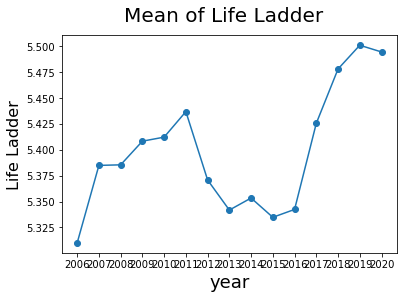

In [6]:
##
fig = plt.figure()
fig.suptitle('Mean of Life Ladder', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('Life Ladder', fontsize=16)
plt.scatter(range(len(avg_dict)), list(avg_dict.values()))
plt.plot(range(len(avg_dict)), list(avg_dict.values()))
plt.xticks(range(len(avg_dict)), list(avg_dict.keys()))
plt.show()

Averge Data to Pandas Series

In [7]:
##https://stackoverflow.com/questions/36038927/whats-the-difference-between-pandas-acf-and-statsmodel-acf
avg = []

for a in avg_dict.values():
    avg.append(a)

avg = pd.Series(avg)
#acf = [avg.autocorr(i) for i in range(len(avg)-1)]
#print(acf)
#acf = pd.DataFrame(acf)
#acf.plot(kind='bar')

ACF Plot

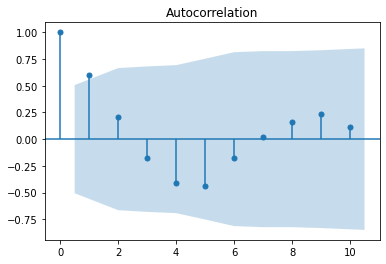

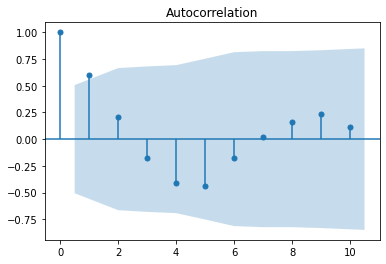

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(avg, lags=10)

PCAF Plot

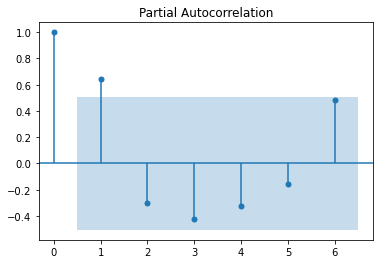

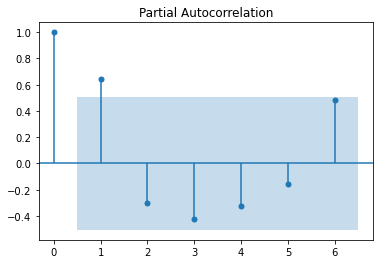

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(avg, lags=6)

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(avg, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  29.861
Date:                Tue, 22 Jun 2021   AIC                            -47.722
Time:                        17:07:25   BIC                            -43.888
Sample:                             0   HQIC                           -48.077
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0599      0.187      0.320      0.749      -0.307       0.427
ar.L2          0.0097      0.163      0.060      0.952      -0.309       0.328
ar.L3         -0.0837      0.218     -0.384      0.7

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


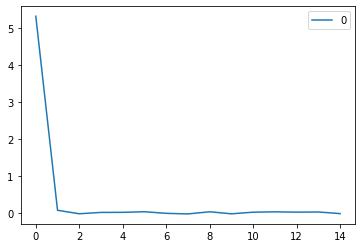

In [13]:
from pandas import DataFrame
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

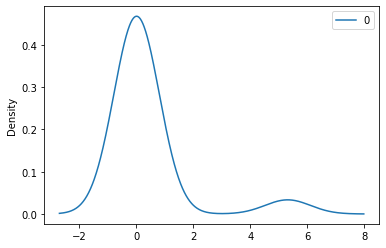

In [15]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [16]:
# summary stats of residuals
print(residuals.describe())

               0
count  15.000000
mean    0.367172
std     1.367661
min    -0.023801
25%    -0.011707
50%     0.022735
75%     0.032946
max     5.309994
